In [153]:
# import the common libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Import inflation function from GDP Housing Analysis
import common_functions

In [154]:
# get GDP data
gdp_data = pd.read_csv("../DataSet/yearlyGDPbyState.csv")

# check that it loaded properly
gdp_data

,Unnamed: 0,year,state,current dollars,GDP,GDP_area
0,1,1995,Alabama,2001,95514.00,Southeast
1,0,1995,Alaska,2001,24791.00,Far West
2,3,1995,Arizona,2001,104586.00,Southwest
3,2,1995,Arkansas,2001,53809.00,Southeast
4,4,1995,California,2001,925931.00,Far West
...,...,...,...,...,...,...
1270,1269,2019,Virginia,2019,554211.25,Southeast
1271,1271,2019,Washington,2019,599607.50,Far West
1272,1273,2019,West Virginia,2019,78189.50,Southeast
1273,1272,2019,Wisconsin,2019,347306.00,Great Lakes


In [156]:
# filter data for just virginia
gdp_data = gdp_data[gdp_data['state']=="Virginia"]

# limit to between 2000 and 2016
gdp_data = gdp_data[gdp_data['year']>=2000]
gdp_data = gdp_data[gdp_data['year']<=2016]

# add inflation adjusted column
common_functions.inflation_adjust(gdp_data)

# check that that inflation column was added, both filters were applied
gdp_data

,Unnamed: 0,year,state,current dollars,GDP,GDP_area,inf-adjusted
301,300,2000,Virginia,2001,260837.000000,Southeast,377764.0
352,351,2001,Virginia,2004,277214.000000,Southeast,375580.0
403,402,2002,Virginia,2004,288840.000000,Southeast,391332.0
454,453,2003,Virginia,2004,304116.000000,Southeast,412028.0
505,504,2004,Virginia,2007,324870.000000,Southeast,401310.0
556,555,2005,Virginia,2007,350288.000000,Southeast,432709.0
607,606,2006,Virginia,2007,368604.000000,Southeast,455334.0
658,657,2007,Virginia,2010,389319.000000,Southeast,457382.0
709,708,2008,Virginia,2010,402853.000000,Southeast,473282.0
760,759,2009,Virginia,2010,409732.000000,Southeast,481363.0


In [157]:
# get evictions data
evc_data = pd.read_csv(r'../DataSet/va_eviction_cities.csv',header=0,encoding = "ISO-8859-1")
# preview data
evc_data

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,5100148,2000,Abingdon,Virginia,7780.0,10.06,1398.75,41.94,440.0,30976.0,...,0.01,0.58,0.05,29.86,28.86,2.06,2.13,0,0,0
1,5100148,2001,Abingdon,Virginia,7780.0,10.06,1438.06,41.94,440.0,30976.0,...,0.01,0.58,0.05,38.50,33.80,2.35,2.68,0,0,0
2,5100148,2002,Abingdon,Virginia,7780.0,10.06,1474.88,41.94,440.0,30976.0,...,0.01,0.58,0.05,61.25,47.14,3.20,4.15,0,0,0
3,5100148,2003,Abingdon,Virginia,7780.0,10.06,1514.18,41.94,440.0,30976.0,...,0.01,0.58,0.05,53.00,31.00,2.05,3.50,0,0,0
4,5100148,2004,Abingdon,Virginia,7780.0,10.06,1552.00,41.94,440.0,30976.0,...,0.01,0.58,0.05,84.20,57.86,3.73,5.43,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10118,5188240,2012,Yorktown,Virginia,130.0,0.00,46.20,51.06,1000.0,62750.0,...,0.00,11.54,0.00,0.70,0.70,1.52,1.52,0,0,0
10119,5188240,2013,Yorktown,Virginia,130.0,0.00,46.90,51.06,1000.0,62750.0,...,0.00,11.54,0.00,0.70,0.00,0.00,1.49,0,0,0
10120,5188240,2014,Yorktown,Virginia,130.0,0.00,47.60,51.06,1000.0,62750.0,...,0.00,11.54,0.00,2.80,0.00,0.00,5.88,1,0,0
10121,5188240,2015,Yorktown,Virginia,130.0,0.00,49.00,51.06,1000.0,62750.0,...,0.00,11.54,0.00,2.80,0.00,0.00,5.71,1,0,0


In [158]:
# create a second data set averaging accross all of virginia
evc_mean = evc_data.groupby(['year']).mean()
# drop GEOID and other field that don't make sense as an average
evc_mean = evc_mean.drop(['GEOID','evictions','eviction-filings'], axis=1)
# check data
evc_mean

,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,...,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
year,,,,,,,,,,,,,,,,,,,,,
2000,11772.024259,11.870000,1113.026717,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.211321,1.996819,0.028059,1.178113,0.120458,3.385601,4.377060,0.026891,0.0,0.0
2001,11772.024259,11.870000,1204.411079,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.211321,1.996819,0.028059,1.178113,0.120458,3.669979,4.950373,0.045378,0.0,0.0
2002,11772.024259,11.870000,1167.352432,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.211321,1.996819,0.028059,1.178113,0.120458,3.589514,6.551304,0.005042,0.0,0.0
2003,11772.024259,11.870000,1220.029386,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.211321,1.996819,0.028059,1.178113,0.120458,3.528072,6.294249,0.114286,0.0,0.0
2004,11772.024259,11.870000,1233.541124,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.211321,1.996819,0.028059,1.178113,0.120458,3.841005,8.018075,0.000000,0.0,0.0
2005,12428.849057,9.824340,1250.299864,33.472776,800.338028,50835.905660,209925.002717,29.342776,74.381536,15.850000,...,0.212372,2.537601,0.047332,1.329973,0.182183,3.488620,8.009455,0.000000,0.0,0.0
2006,12428.849057,9.824340,1265.145945,33.472776,800.338028,50835.905660,209925.002717,29.342776,74.381536,15.850000,...,0.212372,2.537601,0.047332,1.329973,0.182183,3.603220,8.424566,0.011765,0.0,0.0
2007,12428.849057,9.824340,887.566833,33.472776,800.338028,50835.905660,209925.002717,29.342776,74.381536,15.850000,...,0.212372,2.537601,0.047332,1.329973,0.182183,3.779382,5.395299,0.047059,0.0,0.0
2008,12428.849057,9.824340,899.944960,33.472776,800.338028,50835.905660,209925.002717,29.342776,74.381536,15.850000,...,0.212372,2.537601,0.047332,1.329973,0.182183,4.344841,5.281394,0.063866,0.0,0.0


In [160]:
# create a third data set summing all of Virginia
evc_sum = evc_data.groupby(['year']).sum()
# note: this does not match the entire population of virginia.  Persumably there are some communities missing.
# note: Eviction filings and evictions are presented in fractions is this because they are in thousands or because they are estimates?

# check the new data frame
evc_sum

,GEOID,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
year,,,,,,,,,,,,,,,,,,,,,
2000,3060320666,4367421.0,4403.77,518670.45,11967.96,208032.0,15137245.0,41157500.0,8903.8,28926.92,...,10.41,437.08,44.69,69268.97,35576.57,1577.69,2039.71,16,0,0
2001,3060320666,4367421.0,4403.77,580526.14,11967.96,208032.0,15137245.0,41157500.0,8903.8,28926.92,...,10.41,437.08,44.69,73799.37,38907.10,1768.93,2386.08,27,0,0
2002,3060320666,4367421.0,4403.77,600019.15,11967.96,208032.0,15137245.0,41157500.0,8903.8,28926.92,...,10.41,437.08,44.69,107198.46,42529.75,1845.01,3367.37,3,0,0
2003,3060320666,4367421.0,4403.77,714937.22,11967.96,208032.0,15137245.0,41157500.0,8903.8,28926.92,...,10.41,437.08,44.69,109694.00,44935.20,2067.45,3688.43,68,0,0
2004,3060320666,4367421.0,4403.77,724088.64,11967.96,208032.0,15137245.0,41157500.0,8903.8,28926.92,...,10.41,437.08,44.69,133841.38,47555.56,2254.67,4706.61,0,0,0
2005,3060320666,4611103.0,3644.83,733926.02,12418.40,284120.0,18860121.0,77252401.0,10358.0,27595.55,...,17.56,493.42,67.59,136024.47,43936.76,2047.82,4701.55,0,0,0
2006,3060320666,4611103.0,3644.83,742640.67,12418.40,284120.0,18860121.0,77252401.0,10358.0,27595.55,...,17.56,493.42,67.59,137974.30,43075.76,2115.09,4945.22,7,0,0
2007,3060320666,4611103.0,3644.83,445558.55,12418.40,284120.0,18860121.0,77252401.0,10358.0,27595.55,...,17.56,493.42,67.59,54867.08,30253.92,1897.25,2708.44,28,0,0
2008,3060320666,4611103.0,3644.83,451772.37,12418.40,284120.0,18860121.0,77252401.0,10358.0,27595.55,...,17.56,493.42,67.59,52620.30,33946.20,2181.11,2651.26,38,0,0


In [161]:
# sum both sets of data to ensure data was summed correctly (Is there a better way??)
evc_data.sum(axis=0)

GEOID                                                               52067671838
year                                                                   20327042
name                          AbingdonAbingdonAbingdonAbingdonAbingdonAbingd...
parent-location               VirginiaVirginiaVirginiaVirginiaVirginiaVirgin...
population                                                          8.42339e+07
poverty-rate                                                            84387.4
renter-occupied-households                                          1.08255e+07
pct-renter-occupied                                                      256159
median-gross-rent                                                   5.95295e+06
median-household-income                                              4.0929e+08
median-property-value                                               1.46054e+09
rent-burden                                                              200139
pct-white                               

In [162]:
# compare to above.  Looks good.
evc_sum.sum(axis=0)

GEOID                         5.206767e+10
population                    8.423388e+07
poverty-rate                  8.438742e+04
renter-occupied-households    1.082547e+07
pct-renter-occupied           2.561590e+05
median-gross-rent             5.952951e+06
median-household-income       4.092902e+08
median-property-value         1.460539e+09
rent-burden                   2.001389e+05
pct-white                     5.798224e+05
pct-af-am                     1.228162e+05
pct-hispanic                  4.333683e+04
pct-am-ind                    1.513620e+03
pct-asian                     2.383120e+04
pct-nh-pi                     2.999700e+02
pct-multiple                  1.311318e+04
pct-other                     1.164910e+03
eviction-filings              1.760782e+06
evictions                     6.835282e+05
eviction-rate                 3.895945e+04
eviction-filing-rate          7.337499e+04
low-flag                      2.109000e+03
imputed                       0.000000e+00
subbed     

In [163]:
# add relevant columns from evc_sum to evc_mean createing evc_va
evc_va = evc_mean
evc_va.rename(columns={'population': 'mean-population', 'renter-occupied-households': 'mean-renter-occupied-households'})
evc_va['total population'] = evc_sum['population']
evc_va['renter-occupied-households'] = evc_sum['renter-occupied-households']
evc_va['evictions'] = evc_sum['evictions']

# check new data frame
evc_va

,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,...,pct-nh-pi,pct-multiple,pct-other,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed,total population,evictions
year,,,,,,,,,,,,,,,,,,,,,
2000,11772.024259,11.870000,518670.45,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.028059,1.178113,0.120458,3.385601,4.377060,0.026891,0.0,0.0,4367421.0,35576.57
2001,11772.024259,11.870000,580526.14,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.028059,1.178113,0.120458,3.669979,4.950373,0.045378,0.0,0.0,4367421.0,38907.10
2002,11772.024259,11.870000,600019.15,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.028059,1.178113,0.120458,3.589514,6.551304,0.005042,0.0,0.0,4367421.0,42529.75
2003,11772.024259,11.870000,714937.22,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.028059,1.178113,0.120458,3.528072,6.294249,0.114286,0.0,0.0,4367421.0,44935.20
2004,11772.024259,11.870000,724088.64,32.258652,560.733154,40801.199461,110936.657682,23.999461,77.970135,14.954663,...,0.028059,1.178113,0.120458,3.841005,8.018075,0.000000,0.0,0.0,4367421.0,47555.56
2005,12428.849057,9.824340,733926.02,33.472776,800.338028,50835.905660,209925.002717,29.342776,74.381536,15.850000,...,0.047332,1.329973,0.182183,3.488620,8.009455,0.000000,0.0,0.0,4611103.0,43936.76
2006,12428.849057,9.824340,742640.67,33.472776,800.338028,50835.905660,209925.002717,29.342776,74.381536,15.850000,...,0.047332,1.329973,0.182183,3.603220,8.424566,0.011765,0.0,0.0,4611103.0,43075.76
2007,12428.849057,9.824340,445558.55,33.472776,800.338028,50835.905660,209925.002717,29.342776,74.381536,15.850000,...,0.047332,1.329973,0.182183,3.779382,5.395299,0.047059,0.0,0.0,4611103.0,30253.92
2008,12428.849057,9.824340,451772.37,33.472776,800.338028,50835.905660,209925.002717,29.342776,74.381536,15.850000,...,0.047332,1.329973,0.182183,4.344841,5.281394,0.063866,0.0,0.0,4611103.0,33946.20


In [137]:
#check the formatting for year to see if we can join data based on year
gdp_data.year

301     2000
352     2001
403     2002
454     2003
505     2004
556     2005
607     2006
658     2007
709     2008
760     2009
811     2010
862     2011
913     2012
964     2013
1015    2014
1066    2015
1117    2016
Name: year, dtype: int64

In [164]:
# check eviction data for year format (see above)
evc_va['evictions'].index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')

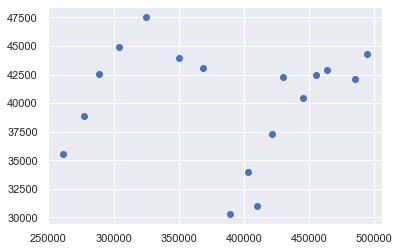

In [165]:
# plot against evictions
plt.scatter(gdp_data['GDP'],evc_va['evictions'])

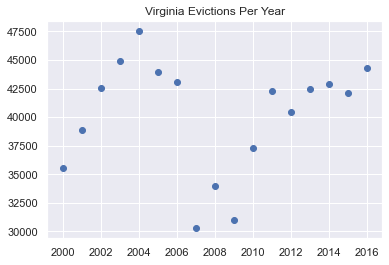

In [166]:
# plot evictions by year
evcfig = plt.figure()
plt.title('Virginia Evictions Per Year')
evcax = plt.scatter(evc_va.index,evc_va['evictions'])

In [167]:
# export plot of evictions by year
evcfig.savefig('Evictions.png')

In [168]:
# align index from gdp_data and evc_va to prepare to join for further analysis
gdp_data=gdp_data.set_index('year')
gdp_data.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')

In [169]:
evc_va.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')

Figure(432x288)


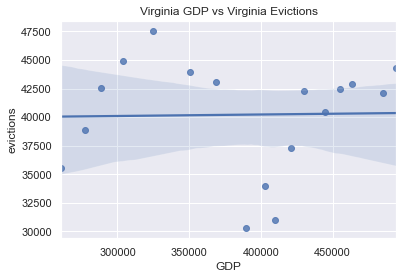

In [170]:
# import seaborn to run the same columns in a regression analysis
import seaborn as sns; sns.set_theme(color_codes=True)

# combine data sets
joined_df = pd.concat([evc_va, gdp_data], axis=1, sort=False)

# create scatter plot with regression
fig = plt.figure()
plt.title('Virginia GDP vs Virginia Evictions')
ax = sns.regplot(x="GDP", y="evictions", data=joined_df)
print(fig)

In [171]:
# Export the final plot with linear regression.
fig.savefig('GDPvsEvictions.png')